In [1]:
import ppscore as pps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler

### Read and Examine data

In [2]:
data=pd.read_csv('adult_with_headers.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There are 6 numerical columns and 9 categorical columns

In [4]:
data.shape

(32561, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are no null values, so no imputation needed

There are no type mismatch, so no change of type needed

### For Scaling data, we'll have to look at how data is distributed across the numerical columns, if the data is normally distributed we use standard scaler and if not we use min max scaler

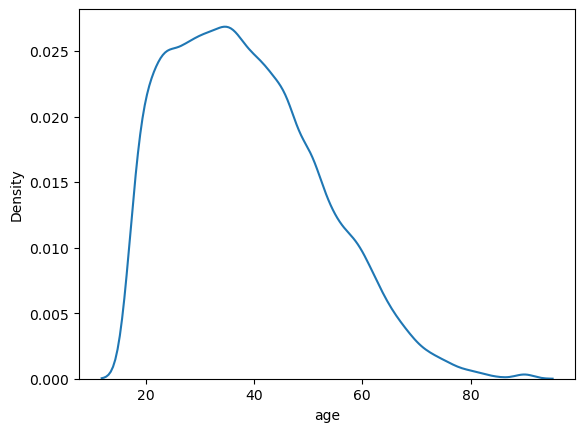

In [6]:
sns.kdeplot(data['age'])
plt.show()

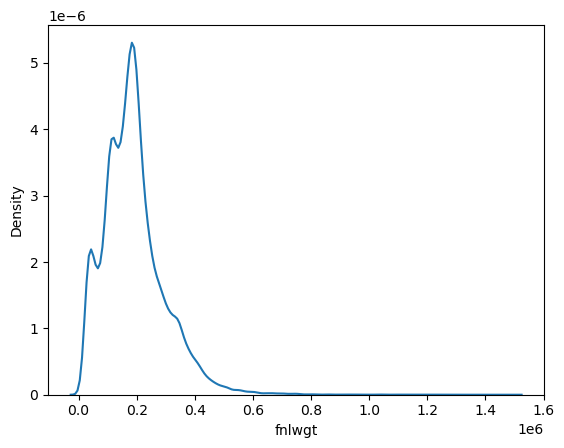

In [7]:
sns.kdeplot(data['fnlwgt'])
plt.show()

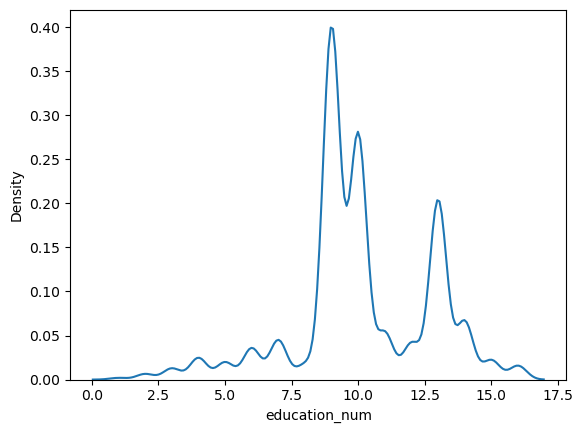

In [8]:
sns.kdeplot(data['education_num'])
plt.show()

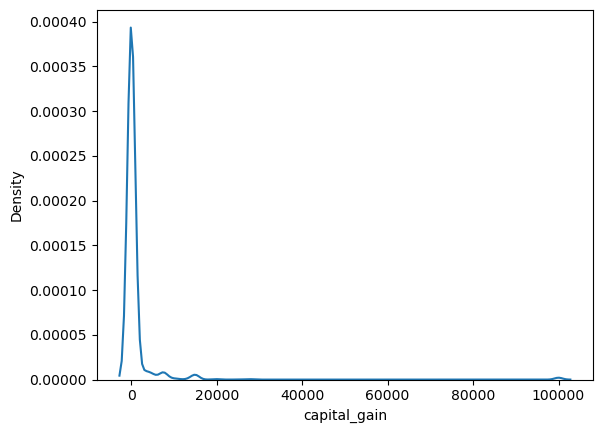

In [9]:
sns.kdeplot(data['capital_gain'])
plt.show()

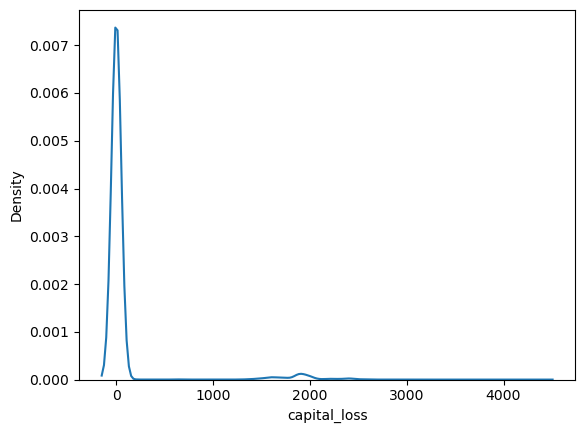

In [10]:
sns.kdeplot(data['capital_loss'])
plt.show()

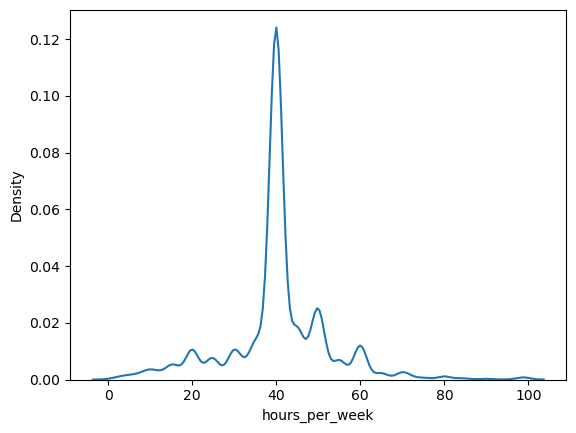

In [11]:
sns.kdeplot(data['hours_per_week'])
plt.show()

### Interpretation

### Standard Scaler
age (roughly symmetric)

education_num (ordinal and limited range)

hours_per_week (can benefit from centering despite being slightly skewed)
### Minmax Scaler
capital_gain (heavily right-skewed, many zeros)

capital_loss (same as above)

fnlwgt (high variance and skewed distribution)



### Data Scaling

In [12]:
scaled_data=data.copy()
st_scaler=StandardScaler()
st_features=['age','education_num','hours_per_week']
scaled_data[st_features]=st_scaler.fit_transform(data[st_features])
scaled_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,77516,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,83311,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,-2.222153,United-States,<=50K
2,-0.042642,Private,215646,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,-0.035429,United-States,<=50K
3,1.057047,Private,234721,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,-0.035429,United-States,<=50K
4,-0.775768,Private,338409,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,257302,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,-0.197409,United-States,<=50K
32557,0.103983,Private,154374,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,-0.035429,United-States,>50K
32558,1.423610,Private,151910,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,0,0,-0.035429,United-States,<=50K
32559,-1.215643,Private,201490,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,0,0,-1.655225,United-States,<=50K


In [13]:
minmax_scaler=MinMaxScaler()
minmax_features=['capital_gain','capital_loss','fnlwgt']
scaled_data[minmax_features]=minmax_scaler.fit_transform(data[minmax_features])
scaled_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,0.044302,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,0.048238,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,-2.222153,United-States,<=50K
2,-0.042642,Private,0.138113,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,-0.035429,United-States,<=50K
3,1.057047,Private,0.151068,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,-0.035429,United-States,<=50K
4,-0.775768,Private,0.221488,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.166404,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,-0.197409,United-States,<=50K
32557,0.103983,Private,0.096500,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,-0.035429,United-States,>50K
32558,1.423610,Private,0.094827,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.128499,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,-1.655225,United-States,<=50K


In [14]:
scaled_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.256100e+04,32561.000000,3.256100e+04,32561.000000,32561.000000,3.256100e+04
mean,-2.705915e-17,0.120545,1.471887e-16,0.010777,0.020042,-1.549355e-17
std,1.000015e+00,0.071685,1.000015e+00,0.073854,0.092507,1.000015e+00
min,-1.582206e+00,0.000000,-3.529656e+00,0.000000,0.000000,-3.194030e+00
25%,-7.757679e-01,0.071679,-4.200596e-01,0.000000,0.000000,-3.542945e-02
50%,-1.159546e-01,0.112788,-3.136003e-02,0.000000,0.000000,-3.542945e-02
75%,6.904838e-01,0.152651,7.460392e-01,0.000000,0.000000,3.695194e-01
max,3.769612e+00,1.000000,2.300838e+00,1.000000,1.000000,4.742967e+00


**Standard Scaling** is preferred when data is normally distributed or when algorithms assume centered data, as it centers features around zero with unit variance.
**Min-Max Scaling** is ideal for algorithms sensitive to feature magnitudes when data has bounded ranges. It rescales features to [0, 1], preserving the original distribution.


### Encoding Categorical Data

In [15]:
scaled_data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

The categorical features such that has more than 5 classes are:

1. workclass
2. education
3. occupation
4. marital_status
5. relationship
6. native_country

The categorical features such that has  <= 5 classes are:

1. race
2. sex
3. income



In [16]:
onehot_features=['race','sex','income']
label_features=['workclass','education','occupation','marital_status','relationship','native_country']

In [17]:
OneHot=OneHotEncoder()
LabelEnc=LabelEncoder()
scaled_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### One Hot Encoding 

In [18]:
scaled_encoded_data=pd.get_dummies(scaled_data,columns=onehot_features,drop_first=True)
scaled_encoded_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,0.030671,State-gov,0.044302,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,0.021740,0.0,-0.035429,United-States,0,0,0,1,1,0
1,0.837109,Self-emp-not-inc,0.048238,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,0.000000,0.0,-2.222153,United-States,0,0,0,1,1,0
2,-0.042642,Private,0.138113,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,0.000000,0.0,-0.035429,United-States,0,0,0,1,1,0
3,1.057047,Private,0.151068,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,0.000000,0.0,-0.035429,United-States,0,1,0,0,1,0
4,-0.775768,Private,0.221488,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,0.000000,0.0,-0.035429,Cuba,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.166404,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,0.000000,0.0,-0.197409,United-States,0,0,0,1,0,0
32557,0.103983,Private,0.096500,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,0.000000,0.0,-0.035429,United-States,0,0,0,1,1,1
32558,1.423610,Private,0.094827,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,0.000000,0.0,-0.035429,United-States,0,0,0,1,0,0
32559,-1.215643,Private,0.128499,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,0.000000,0.0,-1.655225,United-States,0,0,0,1,1,0


### Label Encoding

In [19]:
for col in label_features:
    scaled_encoded_data[col]=LabelEnc.fit_transform(scaled_encoded_data[col])
scaled_encoded_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,0.030671,7,0.044302,9,1.134739,4,1,1,0.021740,0.0,-0.035429,39,0,0,0,1,1,0
1,0.837109,6,0.048238,9,1.134739,2,4,0,0.000000,0.0,-2.222153,39,0,0,0,1,1,0
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,0.000000,0.0,-0.035429,39,0,0,0,1,1,0
3,1.057047,4,0.151068,1,-1.197459,2,6,0,0.000000,0.0,-0.035429,39,0,1,0,0,1,0
4,-0.775768,4,0.221488,9,1.134739,2,10,5,0.000000,0.0,-0.035429,5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.166404,7,0.746039,2,13,5,0.000000,0.0,-0.197409,39,0,0,0,1,0,0
32557,0.103983,4,0.096500,11,-0.420060,2,7,0,0.000000,0.0,-0.035429,39,0,0,0,1,1,1
32558,1.423610,4,0.094827,11,-0.420060,6,1,4,0.000000,0.0,-0.035429,39,0,0,0,1,0,0
32559,-1.215643,4,0.128499,11,-0.420060,4,1,3,0.000000,0.0,-1.655225,39,0,0,0,1,1,0


### Pros and Cons

**One-Hot Encoding** avoids ordinal assumptions and is ideal for nominal data but increases dimensionality. **Label Encoding** is memory-efficient and fast but introduces false ordinal relationships, which may mislead algorithms. One-hot suits tree-based and distance-based models better. Label encoding is suitable when categories have true order or when using algorithms that can handle categorical integers properly.


In [20]:
scaled_encoded_data['captial_gain_sqrt']=np.sqrt(scaled_encoded_data['capital_gain'])
scaled_encoded_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,captial_gain_sqrt
0,0.030671,7,0.044302,9,1.134739,4,1,1,0.021740,0.0,-0.035429,39,0,0,0,1,1,0,0.147446
1,0.837109,6,0.048238,9,1.134739,2,4,0,0.000000,0.0,-2.222153,39,0,0,0,1,1,0,0.000000
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,0.000000,0.0,-0.035429,39,0,0,0,1,1,0,0.000000
3,1.057047,4,0.151068,1,-1.197459,2,6,0,0.000000,0.0,-0.035429,39,0,1,0,0,1,0,0.000000
4,-0.775768,4,0.221488,9,1.134739,2,10,5,0.000000,0.0,-0.035429,5,0,1,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.166404,7,0.746039,2,13,5,0.000000,0.0,-0.197409,39,0,0,0,1,0,0,0.000000
32557,0.103983,4,0.096500,11,-0.420060,2,7,0,0.000000,0.0,-0.035429,39,0,0,0,1,1,1,0.000000
32558,1.423610,4,0.094827,11,-0.420060,6,1,4,0.000000,0.0,-0.035429,39,0,0,0,1,0,0,0.000000
32559,-1.215643,4,0.128499,11,-0.420060,4,1,3,0.000000,0.0,-1.655225,39,0,0,0,1,1,0,0.000000


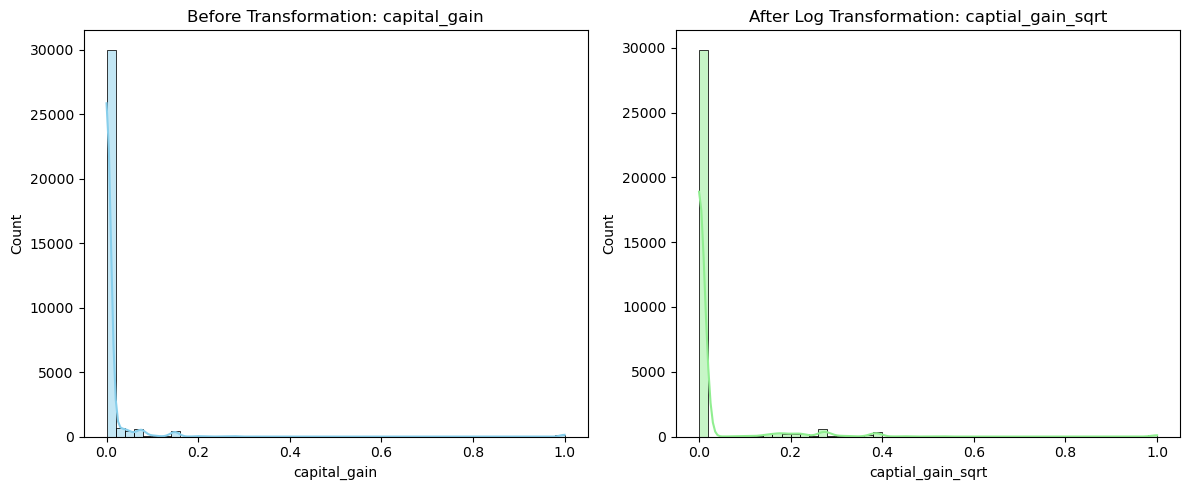

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Before transformation
plt.subplot(1, 2, 1)
sns.histplot(scaled_encoded_data['capital_gain'], bins=50, kde=True, color='skyblue')
plt.title('Before Transformation: capital_gain')

# After transformation
plt.subplot(1, 2, 2)
sns.histplot(scaled_encoded_data['captial_gain_sqrt'], bins=50, kde=True, color='lightgreen')
plt.title('After Log Transformation: captial_gain_sqrt')

plt.tight_layout()
plt.show()


In [22]:
scaled_encoded_data['capital_gain'].skew()

11.953847687699781

In [23]:
scaled_encoded_data['captial_gain_sqrt'].skew()

5.894582011291165

### Interpretation

The log transformation successfully reduced extreme skewness, although the distribution remains positively skewed due to a large number of zero values. This is expected, since most individuals have no capital gains, and a few have very large ones.



### Add New Features

To enhance the predictive power of the model, two new features could be created. 
 
1. The first, is_capitalist, is a binary feature that flags whether an individual has any recorded capital gain. This transformation simplifies the highly skewed capital_gain variable into a meaningful categorical indicator of investment behavior, which may correlate with income class or occupation. 

2. The second feature, net_capital, combines capital_gain and capital_loss into a single measure, offering a holistic view of a person’s net financial activity. This helps the model learn from overall capital dynamics rather than treating gains and losses separately.



In [24]:
scaled_encoded_data['net_capital']=scaled_encoded_data['capital_gain']-scaled_encoded_data['capital_loss']
scaled_encoded_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,captial_gain_sqrt,net_capital
0,0.030671,7,0.044302,9,1.134739,4,1,1,0.021740,0.0,-0.035429,39,0,0,0,1,1,0,0.147446,0.021740
1,0.837109,6,0.048238,9,1.134739,2,4,0,0.000000,0.0,-2.222153,39,0,0,0,1,1,0,0.000000,0.000000
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,0.000000,0.0,-0.035429,39,0,0,0,1,1,0,0.000000,0.000000
3,1.057047,4,0.151068,1,-1.197459,2,6,0,0.000000,0.0,-0.035429,39,0,1,0,0,1,0,0.000000,0.000000
4,-0.775768,4,0.221488,9,1.134739,2,10,5,0.000000,0.0,-0.035429,5,0,1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.166404,7,0.746039,2,13,5,0.000000,0.0,-0.197409,39,0,0,0,1,0,0,0.000000,0.000000
32557,0.103983,4,0.096500,11,-0.420060,2,7,0,0.000000,0.0,-0.035429,39,0,0,0,1,1,1,0.000000,0.000000
32558,1.423610,4,0.094827,11,-0.420060,6,1,4,0.000000,0.0,-0.035429,39,0,0,0,1,0,0,0.000000,0.000000
32559,-1.215643,4,0.128499,11,-0.420060,4,1,3,0.000000,0.0,-1.655225,39,0,0,0,1,1,0,0.000000,0.000000


In [25]:
scaled_encoded_data.drop(['capital_gain','capital_loss'],axis=1,inplace=True)

In [26]:
scaled_encoded_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,captial_gain_sqrt,net_capital
0,0.030671,7,0.044302,9,1.134739,4,1,1,-0.035429,39,0,0,0,1,1,0,0.147446,0.021740
1,0.837109,6,0.048238,9,1.134739,2,4,0,-2.222153,39,0,0,0,1,1,0,0.000000,0.000000
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,-0.035429,39,0,0,0,1,1,0,0.000000,0.000000
3,1.057047,4,0.151068,1,-1.197459,2,6,0,-0.035429,39,0,1,0,0,1,0,0.000000,0.000000
4,-0.775768,4,0.221488,9,1.134739,2,10,5,-0.035429,5,0,1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.166404,7,0.746039,2,13,5,-0.197409,39,0,0,0,1,0,0,0.000000,0.000000
32557,0.103983,4,0.096500,11,-0.420060,2,7,0,-0.035429,39,0,0,0,1,1,1,0.000000,0.000000
32558,1.423610,4,0.094827,11,-0.420060,6,1,4,-0.035429,39,0,0,0,1,0,0,0.000000,0.000000
32559,-1.215643,4,0.128499,11,-0.420060,4,1,3,-1.655225,39,0,0,0,1,1,0,0.000000,0.000000


In [27]:
scaled_encoded_data['Is_capitalist']=(scaled_encoded_data['net_capital']>0).astype(int)

In [28]:
scaled_encoded_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,captial_gain_sqrt,net_capital,Is_capitalist
0,0.030671,7,0.044302,9,1.134739,4,1,1,-0.035429,39,0,0,0,1,1,0,0.147446,0.021740,1
1,0.837109,6,0.048238,9,1.134739,2,4,0,-2.222153,39,0,0,0,1,1,0,0.000000,0.000000,0
2,-0.042642,4,0.138113,11,-0.420060,0,6,1,-0.035429,39,0,0,0,1,1,0,0.000000,0.000000,0
3,1.057047,4,0.151068,1,-1.197459,2,6,0,-0.035429,39,0,1,0,0,1,0,0.000000,0.000000,0
4,-0.775768,4,0.221488,9,1.134739,2,10,5,-0.035429,5,0,1,0,0,0,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4,0.166404,7,0.746039,2,13,5,-0.197409,39,0,0,0,1,0,0,0.000000,0.000000,0
32557,0.103983,4,0.096500,11,-0.420060,2,7,0,-0.035429,39,0,0,0,1,1,1,0.000000,0.000000,0
32558,1.423610,4,0.094827,11,-0.420060,6,1,4,-0.035429,39,0,0,0,1,0,0,0.000000,0.000000,0
32559,-1.215643,4,0.128499,11,-0.420060,4,1,3,-1.655225,39,0,0,0,1,1,0,0.000000,0.000000,0


### PPScore

In [29]:
pps.matrix(scaled_encoded_data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.742600,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,0.051529,0.052658,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.759000,2.806164,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,0.720260,0.737871,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
356,Is_capitalist,sex_ Male,0.000000,regression,True,mean absolute error,0.336000,0.444782,DecisionTreeRegressor()
357,Is_capitalist,income_ >50K,0.000000,regression,True,mean absolute error,0.242400,0.338087,DecisionTreeRegressor()
358,Is_capitalist,captial_gain_sqrt,0.585172,regression,True,mean absolute error,0.024979,0.010362,DecisionTreeRegressor()
359,Is_capitalist,net_capital,0.000000,regression,True,mean absolute error,0.032735,0.050834,DecisionTreeRegressor()


In [30]:
score =pps.matrix(scaled_encoded_data)[['x','y','ppscore']]
score

,x,y,ppscore
0,age,age,1.000000
1,age,workclass,0.000000
2,age,fnlwgt,0.000000
3,age,education,0.000000
4,age,education_num,0.000000
...,...,...,...
356,Is_capitalist,sex_ Male,0.000000
357,Is_capitalist,income_ >50K,0.000000
358,Is_capitalist,captial_gain_sqrt,0.585172
359,Is_capitalist,net_capital,0.000000


In [50]:
score[(score['ppscore']<1) & (score['ppscore']>=0.2)] 

,x,y,ppscore
61,education,education_num,1.000000
95,marital_status,age,0.201582
115,occupation,workclass,0.208607
138,relationship,marital_status,0.295032
147,relationship,sex_ Male,0.225569
181,native_country,race_ Asian-Pac-Islander,0.201972
222,race_ Black,race_ White,0.319227
258,race_ White,race_ Black,0.276603
322,captial_gain_sqrt,Is_capitalist,0.997512
339,net_capital,captial_gain_sqrt,0.997624


The above given features have a ppscore more than 0.5 meaning that they have more relavance when compared to other features

<Axes: >

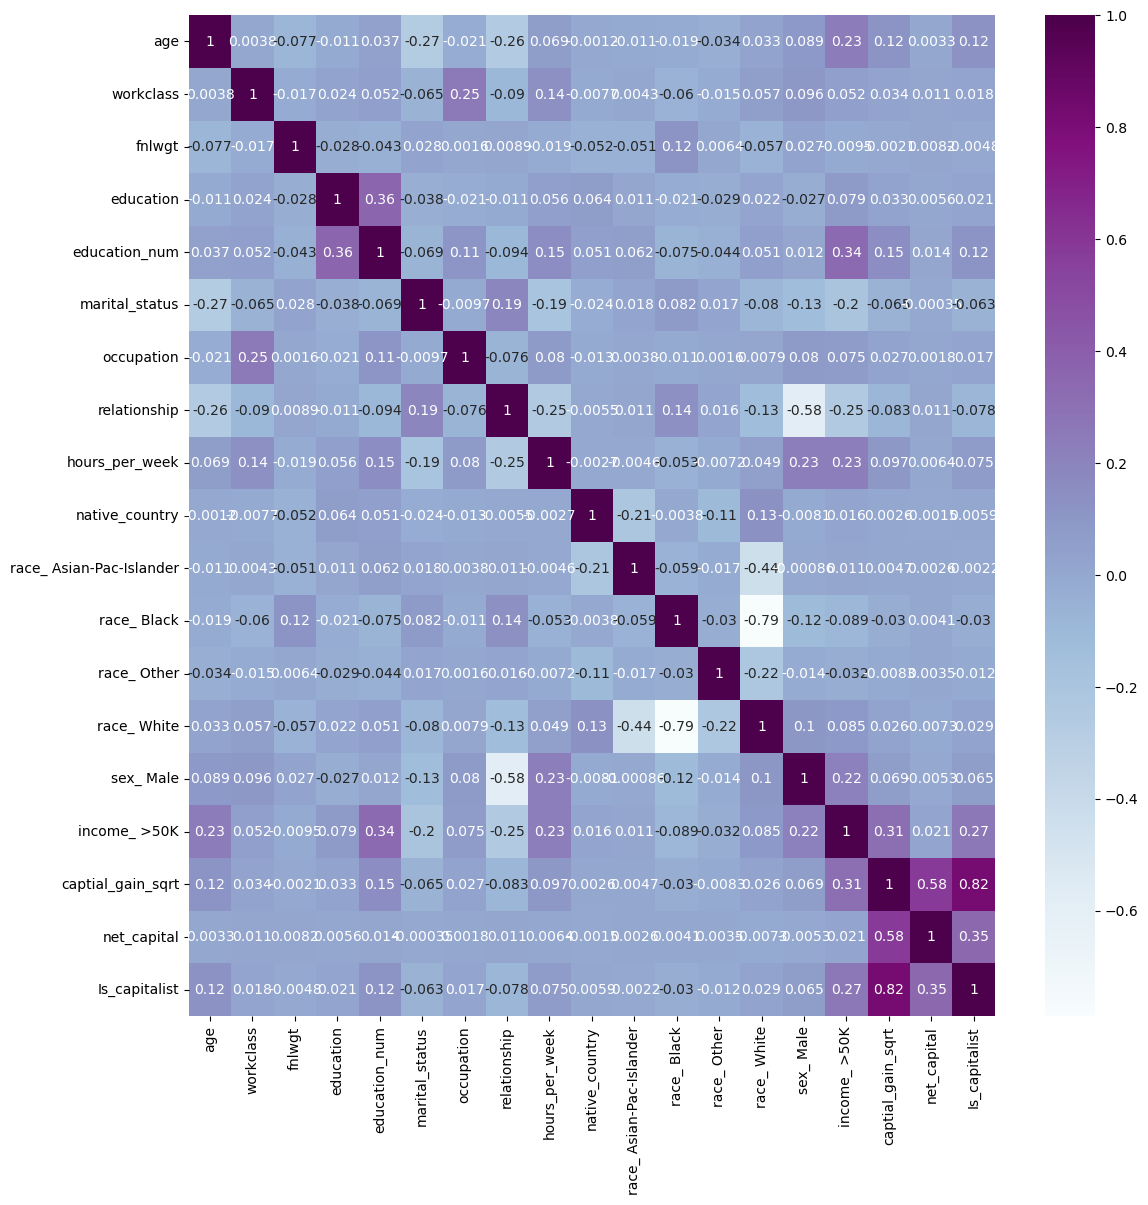

In [46]:
plt.figure(figsize=(13,13))
sns.heatmap(scaled_encoded_data.corr(),annot=True,cmap='BuPu')

### Interpretation
Correlation in your data identifies linear relationships, like between education and education_num, but misses complex or directional effects. PPS reveals true predictive patterns, like how capital_gain_sqrt predicts Is_capitalist, even when correlation appears modest. Using both uncovers linear and non-linear signals, enriching feature selection and model interpretability in real-world, mixed-type datasets like this adult income dataset.



### Isolation Forest

In [51]:
from sklearn.ensemble import IsolationForest

In [52]:
model = IsolationForest(contamination=0.05)
model.fit(scaled_encoded_data)

IsolationForest(contamination=0.05)

In [53]:
scaled_encoded_data['anmoly']=model.predict(scaled_encoded_data)

In [54]:
scaled_encoded_data[scaled_encoded_data['anmoly']==-1]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,captial_gain_sqrt,net_capital,Is_capitalist,anmoly
8,-0.555830,4,0.022749,12,1.523438,4,10,1,0.774468,39,0,0,0,1,0,1,0.375288,0.140841,1,-1
11,-0.629143,7,0.087619,9,1.134739,2,10,0,-0.035429,19,1,0,0,0,1,1,0.000000,0.000000,0,-1
14,0.103983,4,0.074359,8,0.357340,2,3,0,-0.035429,0,1,0,0,0,1,1,0.000000,0.000000,0,-1
27,1.130359,0,0.114048,15,-0.031360,2,0,0,1.584366,35,1,0,0,0,1,1,0.000000,0.000000,0,-1
52,0.617171,4,0.026861,14,1.912138,2,10,5,1.584366,16,0,0,0,1,0,1,0.000000,-0.436639,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32525,3.109799,0,0.073480,8,0.357340,0,0,4,-3.194030,0,0,0,0,1,0,0,0.000000,0.000000,0,-1
32531,-0.629143,0,0.014619,9,1.134739,4,0,1,4.742967,39,1,0,0,0,0,0,0.000000,0.000000,0,-1
32533,1.130359,4,0.221205,9,1.134739,2,4,0,0.774468,24,1,0,0,0,1,1,0.000000,0.000000,0,-1
32538,-0.042642,4,0.086181,9,1.134739,0,10,4,0.369519,39,0,1,0,0,0,1,0.387558,0.150202,1,-1


The Data shown above of 1628 records are identified as outliers by the Isolation Forest algorithm with a contamination of 5%.

Outliers can distort model performance by skewing distributions, impacting mean-based algorithms like linear regression. They may cause overfitting, reduce accuracy, and mislead patterns, especially in distance-based models like k-NN or clustering, ultimately degrading predictive quality and model generalizability.
